**Define basic functions**

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# sigmoid(z) = 1 \ 1 + e^-z
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

# E (y,  y_hat) = -y ln(y_hat) - (1-y) ln(1-y_hat)
def CEE(y_predicted, y):
  if y == 1:
    return -1 * np.log(y_predicted)
  else:
    return -1 * np.log(1 - y_predicted)

# dsig(z) / dz = sig(z)(1 - sig(z))
def dsigmoid(z):
  return z * (1 - z)

# dE / dy_predicted = -(y / y_predictes) + ((1-y) / (1 - y_predicted))
def dCEE(y_predicted, y):
  if y == 1:
    return -1 / y_predicted
  else:
    return 1 / (1 - y_predicted)

**Plot NOR**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


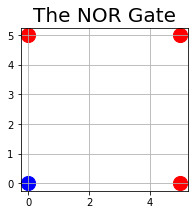

In [16]:
# dataset
x = np.array([[0, 0], [0, 5], [5, 0], [5, 5]])
y = np.array([1, 0, 0, 0])
# Plot
fig = plt.figure(figsize=(3, 3))
plt.title('The NOR Gate', fontsize=20)
ax = fig.add_subplot(111)
# red: class 0, blue: class 1.
ax.scatter(0, 0, s=200, c='b', label="Class 1")
ax.scatter(0, 5, s=200, c='r', label="Class 0")
ax.scatter(5, 0, s=200, c='r', label="Class 0")
ax.scatter(5, 5, s=200, c='r', label="Class 0")
plt.grid()
plt.show()

**Training**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

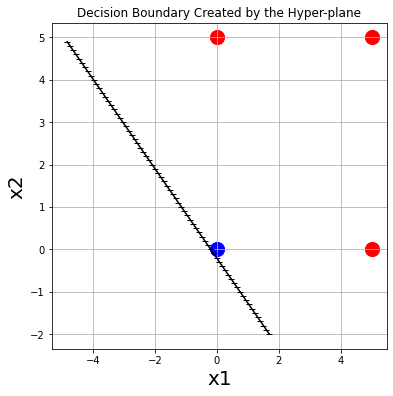

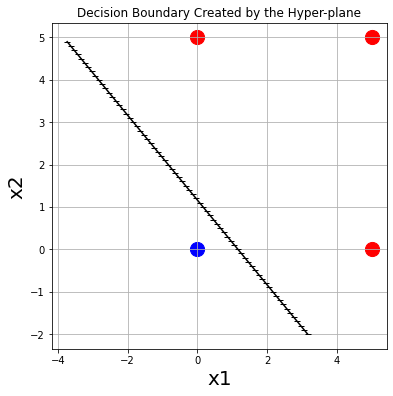

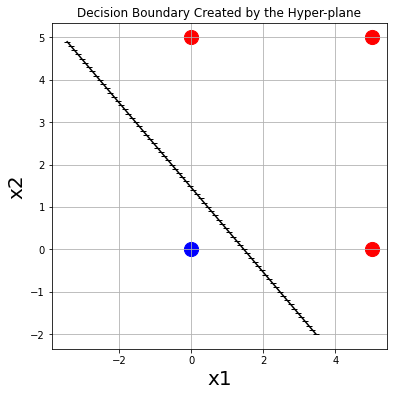

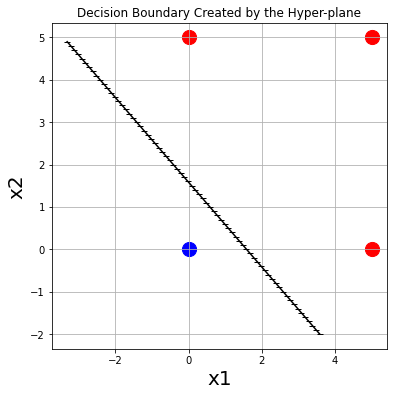

In [18]:
w0 = np.random.uniform(low=-0.01, high=0.01, size=(1,))
w1 = np.random.uniform(low=-0.01, high=0.01, size=(1,))
w2 = np.random.uniform(low=-0.01, high=0.01, size=(1,))
average_CEE = []
for epoch in range(2000):
  errors = []
  seeds = np.arange(x.shape[0])
  np.random.shuffle(seeds)
  for seed in seeds:
    input = x[seed]
    # z = sigma(wi * xi) + w0
    z = w1 * input[0] + w2 * input[1] + w0
    y_predicted = sigmoid(z)
    errors.append(CEE(y_predicted, y[seed]))
    dE_dw0 = dCEE(y_predicted, y[seed]) * dsigmoid(y_predicted)
    dE_dw1 = dCEE(y_predicted, y[seed]) * dsigmoid(y_predicted) * input[0]
    dE_dw2 = dCEE(y_predicted, y[seed]) * dsigmoid(y_predicted) * input[1]
    w0 = w0 - 0.01 * dE_dw0
    w1 = w1 - 0.01 * dE_dw1
    w2 = w2 - 0.01 * dE_dw2
  if epoch % 500 == 0:
    fig = plt.figure(figsize=(6, 6))
    plt.title('The NOR Gate', fontsize=20)
    ax = fig.add_subplot(111)
    ax.scatter(0, 0, s=200, c='b', label="Class 1")
    ax.scatter(0, 5, s=200, c='r', label="Class 0")
    ax.scatter(5, 0, s=200, c='r', label="Class 0")
    ax.scatter(5, 5, s=200, c='r', label="Class 0")
    plt.title('Decision Boundary Created by the Hyper-plane')
    x1 = np.arange(-2, 5, 0.1)
    w1 * x[0] + w2 * x[1] + w0
    x2 = (-w1 / w2) * x1 - (w0 / w2)
    plt.grid()
    plt.plot(x2, x1, '-k', marker='_', label="DB")
    plt.xlabel('x1', fontsize=20)
    plt.ylabel('x2', fontsize=20)